In [1]:
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.sparse
import scipy.optimize
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import sys
import time
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import collections
import functools

import optics_funs as of
import numerical_funs as nf
import matplotlib_funs as mpf
import LCT_funs as lctf
import general_funs as gef

In [3]:
bench_data = gef.load_uncompressed('bench_data_single_cavity.pickle')
N = [x.N for x in bench_data.klu.runs]

N1_cav = [x.N for x in bench_data.klu.runs]
t1_cav = [x.median for x in bench_data.klu.runs]
r1_cav = [x.runs for x in bench_data.klu.runs]
d1_cav = [x.data for x in bench_data.klu.runs]

N2_cav = [x.N for x in bench_data.dense.runs]
t2_cav = [x.median for x in bench_data.dense.runs]
r2_cav = [x.runs for x in bench_data.dense.runs]
d2_cav = [x.data for x in bench_data.dense.runs]

N3_cav = [x.N for x in bench_data.graph.runs]
t3_cav = [x.median for x in bench_data.graph.runs]
r3_cav = [x.runs for x in bench_data.graph.runs]
d3_cav = [x.data for x in bench_data.graph.runs]

/home/alexei/git/alexei_thesis/notebooks/graph_reduction/bench_single_cavity.png
/home/alexei/git/alexei_thesis/notebooks/graph_reduction/bench_single_cavity.pdf


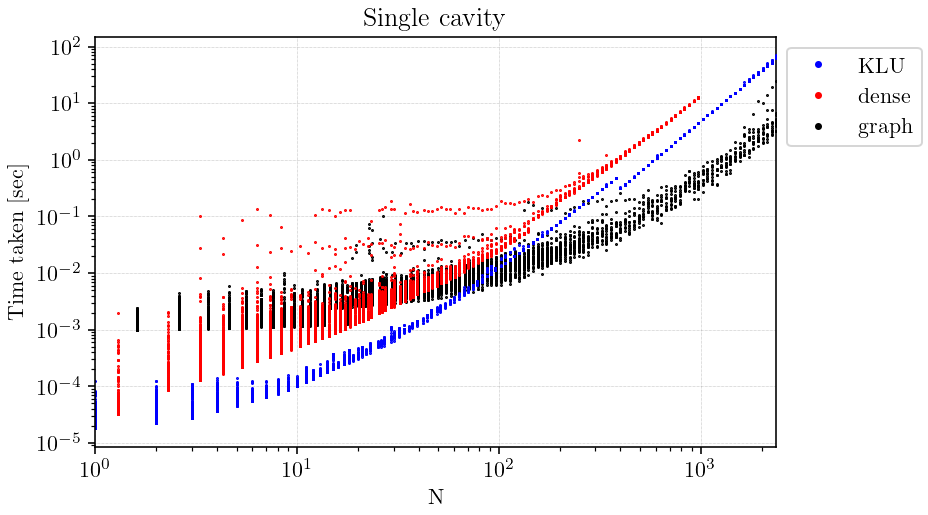

In [140]:
with mpf.style_context(['thesis']):
    fig, ax = mpf.subplots(1,1)

    for i,N_d in enumerate(zip(N1_cav, d1_cav)):
        N,d = N_d
        if i == 0:
            plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, label='KLU', rasterized=True)
        else:
            plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, zorder=3, rasterized=True)

    for i,N_d in enumerate(zip(N2_cav, d2_cav)):
        N,d = N_d
        if i == 0:
            plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, label='dense', rasterized=True)
        else:
            plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, zorder=2, rasterized=True)

    for i,N_d in enumerate(zip(N3_cav, d3_cav)):
        N,d = N_d
        if i == 0:
            plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, label='graph', rasterized=True)
        else:
            plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, zorder=1, rasterized=True)

    mpf.outer_legend(markerscale=5)
    plt.xlabel('N')
    plt.ylabel('Time taken [sec]')
    plt.title('Single cavity')
    mpf.thesis_figsize(fig)
    mpf.thesis_savefig(fig, 'bench_single_cavity.pdf')

In [5]:
bench_data = gef.load_uncompressed('bench_data_prc.pickle')

N1_prc = [x.N for x in bench_data.klu.runs]
t1_prc = [x.median for x in bench_data.klu.runs]
r1_prc = [x.runs for x in bench_data.klu.runs]
d1_prc = [x.data for x in bench_data.klu.runs]

N2_prc = [x.N for x in bench_data.dense.runs]
t2_prc = [x.median for x in bench_data.dense.runs]
r2_prc = [x.runs for x in bench_data.dense.runs]
d2_prc = [x.data for x in bench_data.dense.runs]

N3_prc = [x.N for x in bench_data.graph.runs]
t3_prc = [x.median for x in bench_data.graph.runs]
r3_prc = [x.runs for x in bench_data.graph.runs]
d3_prc = [x.data for x in bench_data.graph.runs]

/home/alexei/git/alexei_thesis/notebooks/graph_reduction/bench_pr_cavity.png
/home/alexei/git/alexei_thesis/notebooks/graph_reduction/bench_pr_cavity.pdf


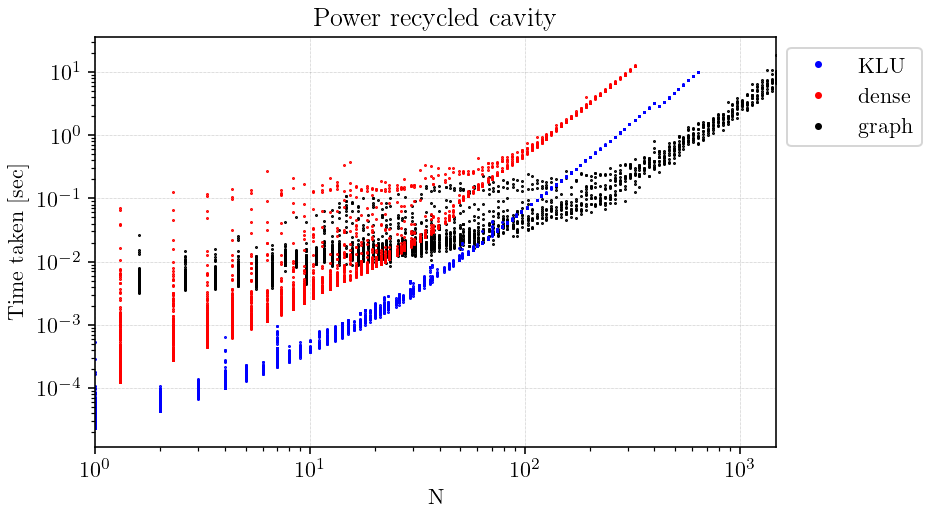

In [142]:
with mpf.style_context(['thesis']):
    fig, ax = mpf.subplots(1,1)

    for i,N_d in enumerate(zip(N1_prc, d1_prc)):
        N,d = N_d
        if i == 0:
            plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, label='KLU', rasterized=True)
        else:
            plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, zorder=3, rasterized=True)

    for i,N_d in enumerate(zip(N2_prc, d2_prc)):
        N,d = N_d
        if i == 0:
            plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, label='dense', rasterized=True)
        else:
            plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, zorder=2, rasterized=True)

    for i,N_d in enumerate(zip(N3_prc, d3_prc)):
        N,d = N_d
        if i == 0:
            plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, label='graph', rasterized=True)
        else:
            plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, zorder=1, rasterized=True)

    mpf.outer_legend(markerscale=5)
    plt.xlabel('N')
    plt.ylabel('Time taken [sec]')
    plt.title('Power recycled cavity')
    mpf.thesis_figsize(fig)
    mpf.thesis_savefig(fig, 'bench_pr_cavity')

In [4]:
bench_data = gef.load_uncompressed('bench_data_drmi.pickle')

N1_drmi = [x.N for x in bench_data.klu.runs]
t1_drmi = [x.median for x in bench_data.klu.runs]
r1_drmi = [x.runs for x in bench_data.klu.runs]
d1_drmi = [x.data for x in bench_data.klu.runs]

N2_drmi = [x.N for x in bench_data.dense.runs]
t2_drmi = [x.median for x in bench_data.dense.runs]
r2_drmi = [x.runs for x in bench_data.dense.runs]
d2_drmi = [x.data for x in bench_data.dense.runs]

N3_drmi = [x.N for x in bench_data.graph.runs]
t3_drmi = [x.median for x in bench_data.graph.runs]
r3_drmi = [x.runs for x in bench_data.graph.runs]
d3_drmi = [x.data for x in bench_data.graph.runs]

/home/alexei/git/alexei_thesis/notebooks/graph_reduction/bench_drmi.png
/home/alexei/git/alexei_thesis/notebooks/graph_reduction/bench_drmi.pdf


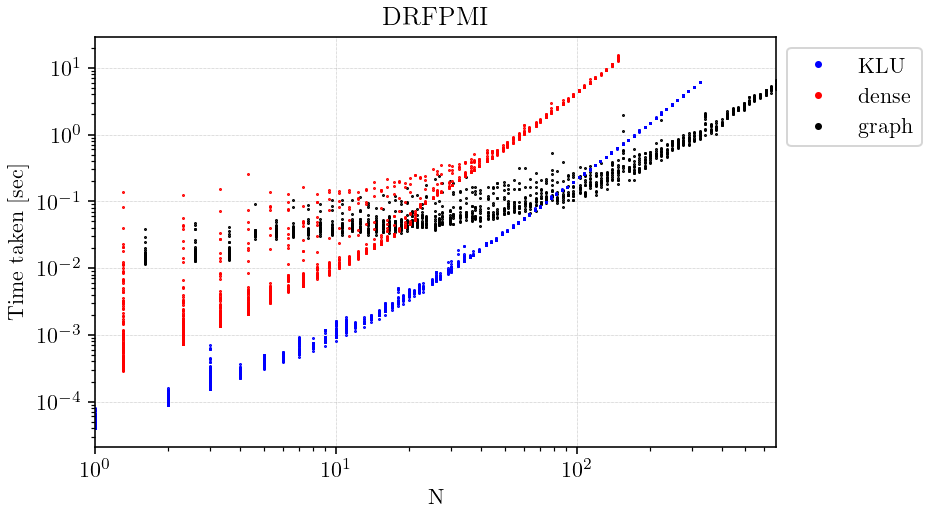

In [6]:
with mpf.style_context(['thesis']):
    fig, ax = mpf.subplots(1,1)

    for i,N_d in enumerate(zip(N1_drmi, d1_drmi)):
        N,d = N_d
        if i == 0:
            plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, label='KLU', rasterized=True)
        else:
            plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, zorder=3, rasterized=True)

    for i,N_d in enumerate(zip(N2_drmi, d2_drmi)):
        N,d = N_d
        if i == 0:
            plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, label='dense', rasterized=True)
        else:
            plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, zorder=2, rasterized=True)

    for i,N_d in enumerate(zip(N3_drmi, d3_drmi)):
        N,d = N_d
        if i == 0:
            plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, label='graph', rasterized=True)
        else:
            plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, zorder=1, rasterized=True)

    mpf.outer_legend(markerscale=5)
    plt.xlabel('N')
    plt.ylabel('Time taken [sec]')
    plt.title('DRFPMI')

    mpf.thesis_figsize(fig)
    mpf.thesis_savefig(fig, 'bench_drmi')

Text(0.5, 1.0, 'KLU')

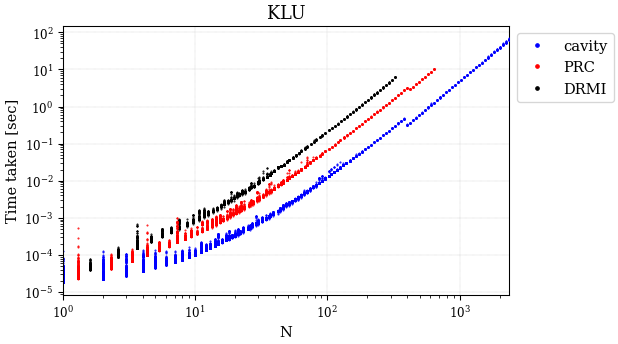

In [13]:
for i,N_d in enumerate(zip(N1_cav, d1_cav)):
    N,d = N_d
    if i == 0:
        plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, label='cavity')
    else:
        plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, zorder=3)
    
for i,N_d in enumerate(zip(N1_prc, d1_prc)):
    N,d = N_d
    if i == 0:
        plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, label='PRC')
    else:
        plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, zorder=2)
    
for i,N_d in enumerate(zip(N1_drmi, d1_drmi)):
    N,d = N_d
    if i == 0:
        plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, label='DRMI')
    else:
        plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, zorder=1)
        
mpf.outer_legend(markerscale=5)
plt.xlabel('N')
plt.ylabel('Time taken [sec]')
plt.title('KLU')

Text(0.5, 1.0, 'Dense solver')

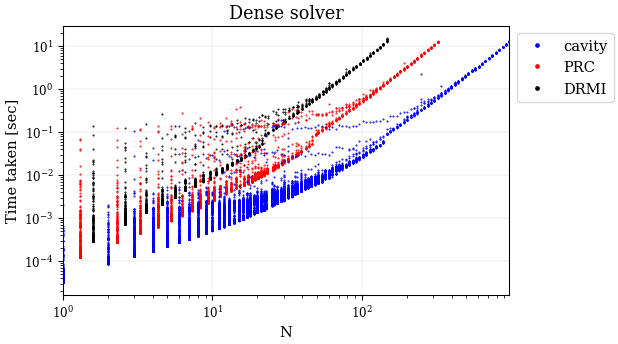

In [10]:
for i,N_d in enumerate(zip(N2_cav, d2_cav)):
    N,d = N_d
    if i == 0:
        plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, label='cavity')
    else:
        plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, zorder=3)
    
for i,N_d in enumerate(zip(N2_prc, d2_prc)):
    N,d = N_d
    if i == 0:
        plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, label='PRC')
    else:
        plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, zorder=2)
    
for i,N_d in enumerate(zip(N2_drmi, d2_drmi)):
    N,d = N_d
    if i == 0:
        plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, label='DRMI')
    else:
        plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, zorder=1)
        
mpf.outer_legend(markerscale=5)
plt.xlabel('N')
plt.ylabel('Time taken [sec]')
plt.title('Dense solver')

Text(0.5, 1.0, 'Graph solver')

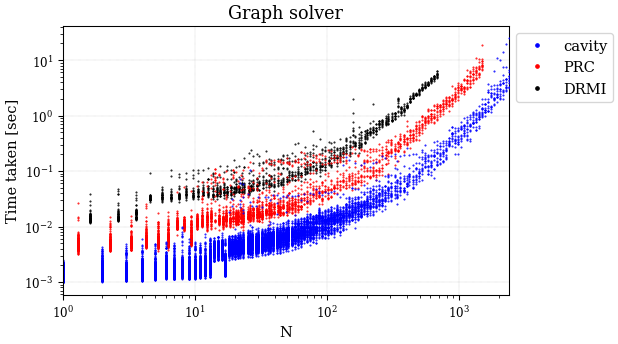

In [11]:
for i,N_d in enumerate(zip(N3_cav, d3_cav)):
    N,d = N_d
    if i == 0:
        plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, label='cavity')
    else:
        plt.loglog(np.ones_like(d)*N, d, 'b.', ms=1, zorder=3)
    
for i,N_d in enumerate(zip(N3_prc, d3_prc)):
    N,d = N_d
    if i == 0:
        plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, label='PRC')
    else:
        plt.loglog(np.ones_like(d)*N+0.3, d, 'r.', ms=1, zorder=2)
    
for i,N_d in enumerate(zip(N3_drmi, d3_drmi)):
    N,d = N_d
    if i == 0:
        plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, label='DRMI')
    else:
        plt.loglog(np.ones_like(d)*N+0.6, d, 'k.', ms=1, zorder=1)
        
mpf.outer_legend(markerscale=5)
plt.xlabel('N')
plt.ylabel('Time taken [sec]')
plt.title('Graph solver')

In [55]:
klu_drmi = t2_drmi[np.argmax(N2_drmi)]
graph_drmi = t3_drmi[np.argmax(N2_drmi)]

klu_prc = t2_prc[np.argmax(N2_drmi)]
graph_prc = t3_prc[np.argmax(N2_drmi)]

klu_cav = t2_cav[np.argmax(N2_drmi)]
graph_cav = t3_cav[np.argmax(N2_drmi)]

In [61]:
np.array([klu_cav, klu_prc, klu_drmi])/np.array([graph_cav, graph_prc, graph_drmi])

array([  5.28130062,  18.96252942,  50.3641615 ])

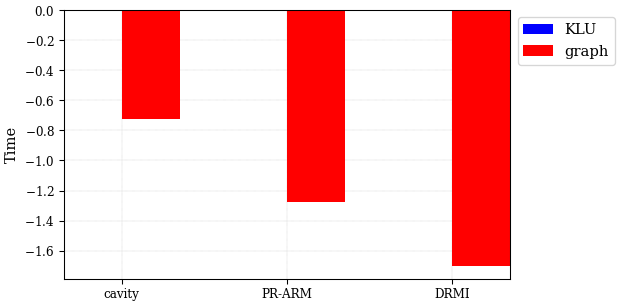

In [69]:
labels = ['cavity', 'PR-ARM', 'DRMI']
klu_bars = np.array([klu_cav, klu_prc, klu_drmi])
graph_bars = np.array([graph_cav, graph_prc, graph_drmi])

graph_bars /= klu_bars
klu_bars /= klu_bars

klu_bars = np.log10(klu_bars)
graph_bars = np.log10(graph_bars)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, klu_bars, width, label='KLU')
rects2 = ax.bar(x + width/2, graph_bars, width, label='graph')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
mpf.outer_legend()


In [137]:
N = 101
D = lctf.D_numerical(N)
D2 = D@D
H = D2 + 1j*np.eye(N)*2/np.sqrt(N)
Hi = np.linalg.inv(H)
n = (np.arange(N)-(N-1)/2)
u = n/np.sqrt(N)

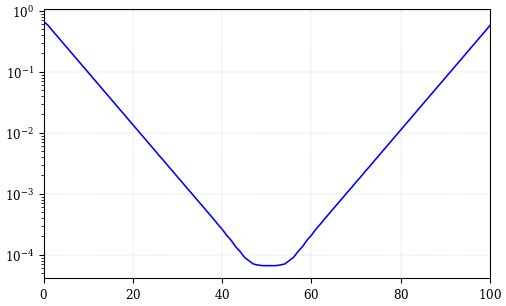

In [134]:
plt.semilogy(np.abs(Hi[:,0]))

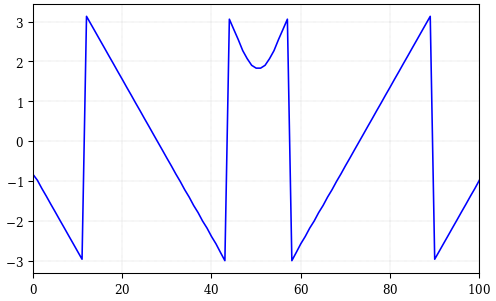

In [135]:
plt.plot(np.angle(Hi[:,0]))

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

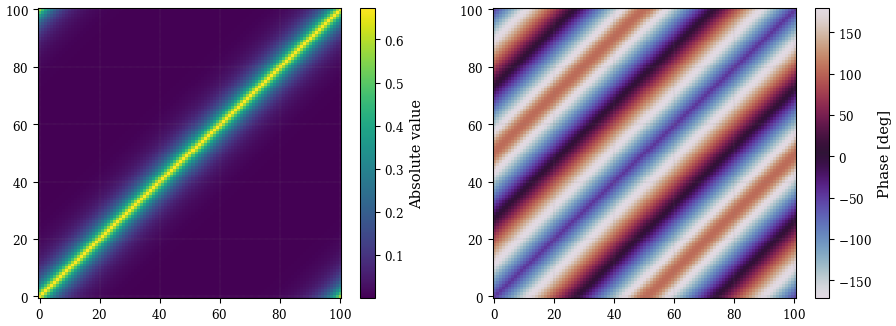

In [136]:
mpf.complex_imshow(Hi, mode='abs:deg')